## _Response Modeling of Bank Marketing Campaign_

<br />

<img src="AI.png" width = '400'><br>


### _Business Scenario_

There has been a revenue decline for the Portuguese bank and they would like to know what actions to take. After investigation, we found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients.


* The task is to build a POC for the problem



</br>

* The data is related with direct marketing campaigns of a Portuguese banking institution. 

* The marketing campaigns were based on phone calls. 

* Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## _Attributes Information_


### _Bank client data:_
1 - age (numeric)

2 - job : type of job 
(categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status 
(categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### _Related with the last contact of the current campaign:_
8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year 
(categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week 
(categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). 
Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### _Other attributes:_

12 - campaign: number of contacts performed during this campaign and for this client 
(numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
(numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### _Social and economic context attributes_
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
# Set Directory
import os
#os.getcwd()

## _Exploratory Analysis_

### _Import Libraries_

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.impute import SimpleImputer


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer



from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt 



import seaborn as sns



from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


### _Read in the data_

In [2]:
import pandas as pd
import numpy as np


In [3]:
bank_data = pd.read_csv('bank-additional-full.csv')
test_data = pd.read_csv('test_cases.csv')






### _Understand the dataset_

In [3]:
# What are the names of the columns?
print(bank_data.columns)
print(test_data.columns)

Index(['customer_no', 'age', 'job', 'marital', 'education', 'credit_default',
       'housing', 'loan', 'contact', 'contacted_month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')
Index(['customer_no', 'age', 'job', 'marital', 'education', 'credit_default',
       'housing', 'loan', 'contact', 'contacted_month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [4]:
# What are the data types?
bank_data.dtypes

customer_no          int64
age                  int64
job                 object
marital             object
education           object
credit_default      object
housing             object
loan                object
contact             object
contacted_month     object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp_var_rate       float64
cons_price_idx     float64
cons_conf_idx      float64
euribor3m          float64
nr_employed        float64
y                   object
dtype: object

In [4]:
bank_data.head(5)

,customer_no,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# What is the distribution of numerical columns?
bank_data.describe()

,customer_no,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20594.50000,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,11890.09578,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,1.00000,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10297.75000,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20594.50000,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30891.25000,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41188.00000,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [42]:
bank_data.shape

(41188, 21)

In [11]:
bank_data.describe(include=['int64','float64'])

,customer_no,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20594.50000,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,11890.09578,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,1.00000,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10297.75000,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20594.50000,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30891.25000,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41188.00000,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [1]:
# What about categorical variable levels count?
#bank_data.describe(include=['object'])

### _Distribition of dependent variable_

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

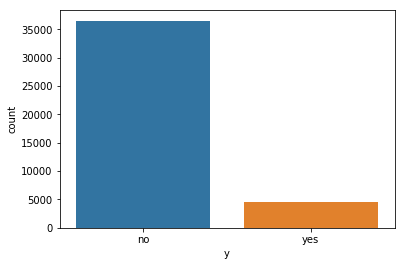

In [18]:
sns.countplot(x='y',data=bank_data)
plt.show()

In [21]:
bank_data['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [25]:
r=len(bank_data[bank_data['y']=='no'])
r

36548

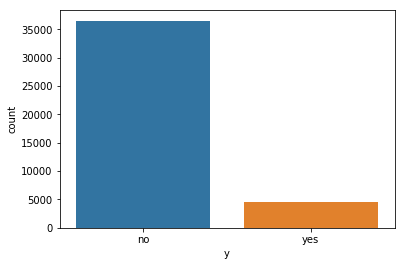

Percentage of people who have taken the campaign: 11.265417111780131 %


In [8]:
# Plot Distribution



# What are the counts?
bank_data.y.value_counts()

# What is the percentage?
count_yes = len(bank_data[bank_data.y == 'yes'])
count_no = len(bank_data[bank_data.y != 'yes'])

percent_success = (count_yes/(count_yes + count_no))*100

print('Percentage of people who have taken the campaign:', percent_success, "%")


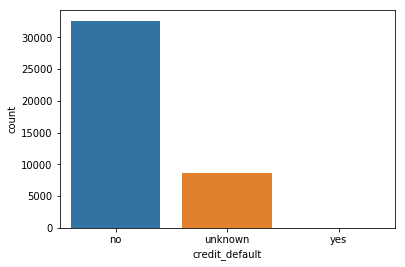

no         32588
unknown     8597
yes            3
Name: credit_default, dtype: int64

In [27]:
sns.countplot(x='credit_default',data=bank_data)
plt.show()
bank_data['credit_default'].value_counts()

### _Distribition of Other Variables_

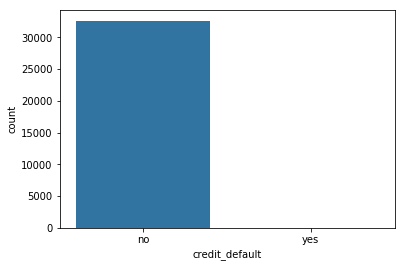

no     32588
yes        3
Name: credit_default, dtype: int64

In [9]:



bank_data.credit_default.value_counts()

In [29]:
bank_data[bank_data['y']=='yes'].day_of_week.value_counts(normalize=True)

thu    0.225216
tue    0.205388
wed    0.204526
mon    0.182543
fri    0.182328
Name: day_of_week, dtype: float64

In [10]:
## when someone is subscribing for the campaign, is it on a particular day of the week?
bank_data[bank_data.y == 'yes'].day_of_week.value_counts(normalize=True)

thu    0.225216
tue    0.205388
wed    0.204526
mon    0.182543
fri    0.182328
Name: day_of_week, dtype: float64

### _Drawing trends toward the target variable_

In [34]:
bank_data.groupby(['y']).mean()

,customer_no,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,,
no,19354.359719,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,30362.742888,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [37]:
# Does the kind of job matter to a subscription? (groupby job and aggregate by mean) 
# Extend to education, marital, etc.
bank_data.groupby(['y','job','education']).mean()


customer_no        age     duration  \
y   job          education                                                   
no  admin.       basic.4y             16514.820896  48.940299   222.313433   
                 basic.6y             16629.888112  42.902098   213.335664   
                 basic.9y             17377.245077  41.000000   215.663020   
                 high.school          19568.494740  37.715982   219.690193   
                 illiterate           12384.000000  51.000000   151.000000   
                 professional.course  20613.092357  39.219745   225.882166   
                 university.degree    21544.648884  37.699391   210.883570   
                 unknown              17159.691943  43.270142   231.165877   
    blue-collar  basic.4y             16424.814123  43.402278   234.422323   
                 basic.6y             17074.007582  38.825625   222.783169   
                 basic.9y             17955.936151  37.914277   231.327224   
                 high.school          18941.209184  36.331633   217.043367   
                 illiterate           17418.625000  49.250000   334.875000   
                 phd                    162.000000  40.000000   134.500000   
                 professional.course  18890.699029  39.220874   236.089806   
                 university.degree    21208.235294  36.105882   211.235294   
                 unknown              15359.614486  42.313084   236.698598   
    entrepreneur basic.4y             17174.261538  44.676923   256.738462   
                 basic.6y             16237.209677  38.822581   196.516129   
                 basic.9y             17974.656566  41.404040   216.252525   
                 high.school          17903.527523  39.399083   248.100917   
                 illiterate           28627.000000  51.000000    87.000000   
                 phd                    109.000000  42.000000   293.000000   
                 professional.course  20102.428571  40.976190   216.150794   
                 university.degree    19421.042279  42.020221   219.485294   
                 unknown              18088.788462  46.769231   212.769231   
    housemaid    basic.4y             17198.342790  47.761229   219.018913   
                 basic.6y             15960.902778  44.027778   208.291667   
                 basic.9y             17433.054945  42.384615   201.945055   
                 high.school          15911.700000  39.443750   238.937500   
...                                            ...        ...          ...   
yes services     university.degree    33828.692308  36.230769   412.500000   
                 unknown              29386.052632  36.157895   550.157895   
    student      basic.4y             37283.625000  20.250000   359.875000   
                 basic.6y             37795.714286  19.857143   285.571429   
                 basic.9y             34836.771429  23.342857   429.171429   
                 high.school          35794.842105  24.324561   430.675439   
                 professional.course  37553.823529  26.882353   319.058824   
                 university.degree    35010.914286  28.857143   384.914286   
                 unknown              36239.389831  24.779661   390.169492   
    technician   basic.4y             34171.666667  47.555556   528.777778   
                 basic.6y             23488.833333  40.000000   701.166667   
                 basic.9y             28253.162162  39.189189   580.297297   
                 high.school          27462.082353  39.423529   584.352941   
                 professional.course  30401.830904  37.924198   541.588921   
                 university.degree    31263.328889  35.413333   550.386667   
                 unknown              32464.360000  44.400000   564.800000   
    unemployed   basic.4y             33389.437500  48.875000   538.562500   
                 basic.6y             24486.750000  47.000000   834.750000   
                 basic.9y             32788.730769  43.730769

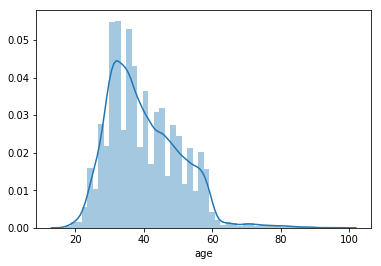

In [38]:
sns.distplot(bank_data['age'])

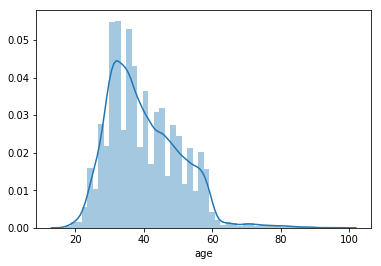

In [12]:
# Check distribution of age
%matplotlib inline
sns.distplot(bank_data["age"] )

In [40]:
# Who are subscribing the most across job ranks?
bank_data[bank_data['y']=='yes'].job.value_counts(normalize=True)

admin.           0.291379
technician       0.157328
blue-collar      0.137500
retired          0.093534
management       0.070690
services         0.069612
student          0.059267
self-employed    0.032112
unemployed       0.031034
entrepreneur     0.026724
housemaid        0.022845
unknown          0.007974
Name: job, dtype: float64

### _Insights_ 
Mention the insights you get from your analysis of the dataset.


In [70]:
bank_data['marital'].value_counts()


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [63]:
bank_data.job.uni

12

In [68]:
def insepectdata(data):
    return pd.DataFrame({'DataTypes':data.dtypes,'No of leves':data.apply(lambda x: x.nunique()),'Levels':data.apply(lambda x: str(x.unique()),axis=0)})

In [67]:
insepectdata(bank_data)

,DataTypes,No of leves,Levels
customer_no,int64,41188,[1 2 3 ... 41186 41187 41188]
age,int64,78,[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 ...
job,object,12,['housemaid' 'services' 'admin.' 'blue-collar'...
marital,object,4,['married' 'single' 'divorced' 'unknown']
education,object,9,['basic.4y' 'high.school' 'basic.6y' 'basic.9y...
credit_default,object,3,['no' 'unknown' 'yes']
housing,object,3,['no' 'yes' 'unknown']
loan,object,3,['no' 'yes' 'unknown']
contact,object,2,['telephone' 'cellular']
contacted_month,object,10,['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'ma...


In [ ]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(bank_data)

In [45]:
cat=bank_data.select_dtypes(include=['object'])
cat

,job,marital,education,credit_default,housing,loan,contact,contacted_month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
5,services,married,basic.9y,unknown,no,no,telephone,may,mon,nonexistent,no
6,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent,no
7,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,nonexistent,no
8,technician,single,professional.course,no,yes,no,telephone,may,mon,nonexistent,no
9,services,single,high.school,no,yes,no,telephone,may,mon,nonexistent,no


In [ ]:
train_levels = bank_data.apply(lambda x: x.unique(),axis=0)
train_levels

In [ ]:
train_levels = bank_data.apply(lambda x: x.unique(),axis=0)
train_levels


In [43]:
num=bank_data.select_dtypes(include=['int64','float64'])
num

,customer_no,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,1,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,2,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,3,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,4,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,5,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
5,6,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0
6,7,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0
7,8,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0
8,9,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0
9,10,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0


### _Feature Engineering_

#### _Fix levels of categorical variable by domain_

In [15]:
# Check levels of education. Is there anything wrong?
bank_data.education.value_counts()

# clean up basic level 
bank_data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

In [19]:
bank_data['education'].value_counts()
bank_data.replace(['basic.6y','basic.4y','basic.9y'],'basic',inplace=True)

In [20]:
bank_data.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1728
illiterate                18
phd                        3
Name: education, dtype: int64

#### _Drop Unnecessary variables_

In [ ]:
bank_data.drop('customer_no',axis=1,inplace=True)


In [18]:
test_data.shape

(4119, 21)

#### _Type Casting_

In [26]:
for col in ['job', 'marital', 'education', 'credit_default', 'housing', 'loan', 'contact', 'contacted_month', 'day_of_week', 'poutcome', 'y']:
    bank_data[col]=bank_data[col].astype('category')


In [27]:
bank_data.dtypes

age                   int64
job                category
marital            category
education          category
credit_default     category
housing            category
loan               category
contact            category
contacted_month    category
day_of_week        category
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome           category
emp_var_rate        float64
cons_price_idx      float64
cons_conf_idx       float64
euribor3m           float64
nr_employed         float64
y                  category
dtype: object

#### _Split Numeric and Categorical Columns

In [33]:
cat_attr=list(bank_data.select_dtypes(include='category').columns)


cat_attr

['job',
 'marital',
 'education',
 'credit_default',
 'housing',
 'loan',
 'contact',
 'contacted_month',
 'day_of_week',
 'poutcome',
 'y']

In [31]:
cat_attr.columns

Index(['job', 'marital', 'education', 'credit_default', 'housing', 'loan',
       'contact', 'contacted_month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [35]:
num_attr=list(bank_data.columns.difference(cat_attr))

num_attr


['age',
 'campaign',
 'cons_conf_idx',
 'cons_price_idx',
 'duration',
 'emp_var_rate',
 'euribor3m',
 'nr_employed',
 'pdays',
 'previous']

#### _Handle Missing Values_

In [40]:
miss_col=bank_data.columns[bank_data.isnull().any()]
missing_cols = bank_data.columns[bank_data.isnull().any()]

Index([], dtype='object')

In [46]:
bank_data.describe(include='all')

,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,7,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,basic,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12513,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [41]:
bank_data.isnull().sum()

age                0
job                0
marital            0
education          0
credit_default     0
housing            0
loan               0
contact            0
contacted_month    0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp_var_rate       0
cons_price_idx     0
cons_conf_idx      0
euribor3m          0
nr_employed        0
y                  0
dtype: int64

In [53]:
for col in ['job', 'marital', 'education', 'credit_default', 'housing', 'loan', 'contact', 'contacted_month', 'day_of_week', 'poutcome', 'y']:
    test_data[col]=test_data[col].astype('category')

In [25]:
# print columns with missing values
missing_cols = bank_data.columns[bank_data.isnull().any()]
missing_cols

Index(['job', 'marital', 'education', 'credit_default', 'housing', 'loan'], dtype='object')

In [54]:
from sklearn.model_selection import train_test_split

In [60]:
x=pd.get_dummies(x)

In [71]:
x=bank_data.copy().drop('y', axis=1)

In [72]:
y=bank_data['y']

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1254)

In [74]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

In [75]:
bank_data['y'] = label_encoder.fit_transform(bank_data['y']) 


In [76]:
bank_data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

## Sklearn pipelines

Pipelines are a way to streamline a lot of the routine processes, encapsulating little pieces of logic into one function call, which makes it easier to actually do modeling instead just writing a bunch of code.

Pipelines are set up with the fit/transform/predict functionality, so you can fit a whole pipeline to the training data and transform to the test data, without having to do it individually for each thing you do. Super convenienent, right?

Steps to follow to create a pipeline

Step 1) Fetch the numerical and categorical columns

Step 2) Create a transformer/pipeline for numerical attributes

    Create a list of tuples where each tuple represents the operation to be performed on numerical attributes

Step 3) Create a transformer/pipeline for categorical attributes

    Create a list of tuples where each tuple represent the operation to be performed on categorical attributes

Step 4) Create a ColumnTransformer which merges both the numerical and categorical transformers

Step5) Create a final pipeline object which includes the ColumnTransformer and an estimator (an algorithm to be build on dataset)

Step6) (optional) Create a GridSearchCV object with pipeline as one of the inputs along with hyperparameter grid and Cross validation object

Step7) Apply fit() on train data and predict() on test data <br><br>

**TL; DR**
Pipeline is a collection of transformers chained together and operate sequentially. (often ending with an estimator)

__Bird's view of sklearn pipeline__

<img src="Pipeline_broadview.png"><br><br>

__Train and Test dataflow inside the sklearn pipeline__
<img src="fit_tranform.jpg">

In [83]:
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#### _Instantiate Pre-processing Objects for Pipeline_

In [85]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_attr),
        ('cat', categorical_transformer, cat_attr)])

In [78]:
# Numerical Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Categorical Pipeline
categorical_transformer =


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_attr),
        ('cat', categorical_transformer, num_attr)])

SyntaxError: invalid syntax (<ipython-input-78-9ff430609894>, line 7)

In [51]:
y_train_plain = bank_data['y']
X_train_plain = bank_data.copy().drop('y', axis=1)
y_test_plain = test_data['y']
X_test_plain = test_data.copy().drop('y', axis=1)

In [52]:
test_data.dtypes

customer_no          int64
age                  int64
job                 object
marital             object
education           object
credit_default      object
housing             object
loan                object
contact             object
contacted_month     object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp_var_rate       float64
cons_price_idx     float64
cons_conf_idx      float64
euribor3m          float64
nr_employed        float64
y                   object
dtype: object

In [50]:
test_data.isnull().sum()
test_data.drop(['customer_no'],axis=1)

,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,36,technician,married,basic.4y,no,no,no,cellular,jul,mon,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,yes
1,39,services,married,high.school,no,no,no,cellular,apr,thu,...,2,999,2,failure,-1.8,93.075,-47.1,1.483,5099.1,no
2,54,management,married,university.degree,no,no,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
3,43,blue-collar,married,basic.9y,no,yes,no,cellular,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
4,26,management,single,university.degree,no,no,no,telephone,jun,mon,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
5,45,admin.,married,university.degree,no,no,no,telephone,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no
6,42,admin.,married,university.degree,no,yes,no,cellular,aug,thu,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
7,42,management,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,32,admin.,divorced,university.degree,no,no,no,cellular,aug,tue,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
9,56,blue-collar,married,basic.4y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### _Instantiate Pipeline Object_

### _Train-Test Split_

In [28]:
X_train, y_train = bank_data.loc[:,bank_data.columns!='y'], bank_data.loc[:,'y']

# Repeat for test


### _Build Logistic Regression Model - 1_

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

### _Evaluate Model_

In [30]:
train_pred = clf_logreg.predict(X_train)
test_pred = clf_logreg.predict(X_test)

print(clf_logreg.score(X_train, y_train))
print(clf_logreg.score(X_test, y_test))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=y_test, y_pred =  test_pred)


0.9114305137418666
0.9104151493080845
[[35573   975]
 [ 2673  1967]]


In [31]:
Accuracy_test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

Precision_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,1]+confusion_matrix_test[0,1])
Recall_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

print("Test Precision: ",Precision_Test)
print("Test Recall: ",Recall_Test)
print("Train Accuracy: ",Accuracy_test)

Test Precision:  0.6555183946488294
Test Recall:  0.42424242424242425
Train Accuracy:  0.9104151493080845


### _Build Decision Tree Model - 2_

In [32]:
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 'classifier__max_depth': [6,8,10,12], 
                 "classifier__min_samples_split": [2, 10, 20],"classifier__min_samples_leaf": [1, 5, 10]}

# Add to GridSearchCV


# Build Model



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                    

In [33]:
# print best parameters


{'classifier__criterion': 'entropy',
 'classifier__max_depth': 6,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 10}

In [34]:
train_pred = dt_grid.predict(X_train)
test_pred = dt_grid.predict(X_test)

print(dt_grid.score(X_train, y_train))
print(dt_grid.score(X_test, y_test))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=y_test, y_pred =  test_pred)


0.9185199572691075
0.9206117989803351
[[35474  1074]
 [ 2282  2358]]


In [35]:
Accuracy_test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

Precision_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,1]+confusion_matrix_test[0,1])
Recall_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

print("Test Precision: ",Precision_Test)
print("Test Recall: ",Recall_Test)
print("Train Accuracy: ",Accuracy_test)

Test Precision:  0.7115987460815048
Test Recall:  0.49134199134199136
Train Accuracy:  0.9206117989803351


### _Build Random Forest Model - 3_ (Using Stratified KFold)

__Stratified K-Folds cross-validator__

This cross-validation object is a **variation** of KFold that returns stratified folds. The folds are made by **preserving the percentage of samples for each class**.

In [36]:
# Build Preprocessor and RF Pipeline



In [37]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

param_grid = {"classifier__n_estimators" : [150, 250, 300],
              "classifier__max_depth" : [5,8,10],
              "classifier__max_features" : [3, 5, 7],
              "classifier__min_samples_leaf" : [4, 6, 8, 10]}

rf_grid = GridSearchCV(clf, param_grid=dt_param_grid, cv=kfold)


In [38]:
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                

In [39]:
rf_grid.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 12,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 20}

In [40]:
train_pred = rf_grid.predict(X_train)
test_pred = rf_grid.predict(X_test)

print(rf_grid.score(X_train, y_train))
print(rf_grid.score(X_test, y_test))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=y_test, y_pred =  test_pred)


Accuracy_test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

Precision_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,1]+confusion_matrix_test[0,1])
Recall_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

print("Test Precision: ",Precision_Test)
print("Test Recall: ",Recall_Test)
print("Train Accuracy: ",Accuracy_test)

0.9256336797125376
0.9235251274581209
[[36099   449]
 [ 2614  2026]]
Test Precision:  0.8356164383561644
Test Recall:  0.3961038961038961
Train Accuracy:  0.9235251274581209


### _Build Gradient Boosting - 4_

In [41]:
clf = Pipeline(steps=[('preprocessor', preprocessor), 
                      ('GBM',GradientBoostingClassifier())])

In [42]:
gbm_param_grid = {'GBM__max_depth': [8,10,12,14], 'GBM__subsample': [0.8, 0.6,], 'GBM__max_features':[0.2, 0.3], 
              'GBM__n_estimators': [10, 20, 30]}

gbm_grid = GridSearchCV(clf, param_grid=gbm_param_grid, cv=3)

gbm_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                    

In [43]:
gbm_grid.best_params_

{'GBM__max_depth': 8,
 'GBM__max_features': 0.2,
 'GBM__n_estimators': 10,
 'GBM__subsample': 0.6}

In [44]:
train_pred = gbm_grid.predict(X_train)
test_pred = gbm_grid.predict(X_test)

print(gbm_grid.score(X_train, y_train))
print(gbm_grid.score(X_test, y_test))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=y_test, y_pred =  test_pred)


Accuracy_test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

Precision_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,1]+confusion_matrix_test[0,1])
Recall_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

print("Test Precision: ",Precision_Test)
print("Test Recall: ",Recall_Test)
print("Train Accuracy: ",Accuracy_test)

0.9129843643779741
0.9106579266812334
[[36429   119]
 [ 3465  1175]]
Test Precision:  0.8790322580645161
Test Recall:  0.23593073593073594
Train Accuracy:  0.9106579266812334


## _Handling Imbalanced Data_

### _1. Class Weights of loss function_

In [46]:
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

# add class weight parameter
dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 'classifier__max_depth': [6,8,10,12], 
                 "classifier__min_samples_split": [2, 10, 20],"classifier__min_samples_leaf": [1, 5, 10]}

dt_grid_bal = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5)
dt_grid_bal.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                    

In [47]:
train_pred = dt_grid_bal.predict(X_train)
test_pred = dt_grid_bal.predict(X_test)

print(dt_grid_bal.score(X_train, y_train))
print(dt_grid_bal.score(X_test, y_test))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=y_test, y_pred =  test_pred)


Accuracy_test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

Precision_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,1]+confusion_matrix_test[0,1])
Recall_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

print("Test Precision: ",Precision_Test)
print("Test Recall: ",Recall_Test)
print("Train Accuracy: ",Accuracy_test)

0.8636981645139361
0.8691429958727847
[[31215  5333]
 [  281  4359]]
Test Precision:  0.45951629863301785
Test Recall:  0.9458874458874459
Train Accuracy:  0.8691429958727847


In [48]:
X_train.shape

(41188, 20)

In [49]:
X_test.shape

(4119, 20)

### _ 2. Oversample Using SMOTE_

<img src="SMOTE.jpg" width = '400'><br>

In [50]:
# Pre-process data with Pipeline for SMOTE



In [51]:
X_train_pp.shape

(41188, 61)

In [52]:
###### from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)


# Fit on Data

# Create Dataframe
os_data_X = pd.DataFrame(data=os_data_X)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']=='no']))
print("Number of subscription",len(os_data_y[os_data_y['y']=='yes']))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='no'])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='yes'])/len(os_data_X))

length of oversampled data is  73096
Number of no subscription in oversampled data 36548
Number of subscription 36548
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [53]:
clf_dt = Pipeline(steps=[('classifier', DecisionTreeClassifier())])

dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 'classifier__max_depth': [6,8,10,12], 
                 "classifier__min_samples_split": [2, 10, 20],"classifier__min_samples_leaf": [1, 5, 10]}

dt_grid_bal = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5)

# Fit on SMOTEd data


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                                               min_weight_fraction_leaf=0.0,
   

In [54]:
train_pred = dt_grid_bal.predict(os_data_X)
test_pred = dt_grid_bal.predict(X_test_pp)

print(dt_grid_bal.score(os_data_X, os_data_y))
print(dt_grid_bal.score(X_test_pp, y_test))

print(confusion_matrix(y_true=os_data_y, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=y_test, y_pred =  test_pred)


Accuracy_test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

Precision_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,1]+confusion_matrix_test[0,1])
Recall_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

print("Test Precision: ",Precision_Test)
print("Test Recall: ",Recall_Test)
print("Train Accuracy: ",Accuracy_test)

0.9034967713691584
0.8703568827385287
[[31434  5114]
 [ 1940 34608]]
Test Precision:  0.4606986899563319
Test Recall:  0.9134199134199135
Train Accuracy:  0.8703568827385287


## _Insights_

* Excel Sheet Analysis


* Positive : Yes to Campaign ; Negative : No to Campaign


* Recall Importance : False pos